In [44]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import torch
sns.set_theme()

In [2]:
ds = load_dataset("Sp1786/multiclass-sentiment-analysis-dataset")
ds

DatasetDict({
    train: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 31232
    })
    validation: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 5205
    })
    test: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 5206
    })
})

## Inspect the data

In [3]:
ds['train'].to_pandas().head()

,id,text,label,sentiment
0,9536,"Cooking microwave pizzas, yummy",2,positive
1,6135,Any plans of allowing sub tasks to show up in ...,1,neutral
2,17697,"I love the humor, I just reworded it. Like sa...",2,positive
3,14182,naw idk what ur talkin about,1,neutral
4,17840,That sucks to hear. I hate days like that,0,negative


In [4]:
ds['validation'].to_pandas().head()

,id,text,label,sentiment
0,317,Laying in bed til workkk... Oh the life. Defin...,0,negative
1,24292,ooohhh imma need you to get on that asap love...,2,positive
2,3513,"Thanks! I love it they have a video, so you d...",2,positive
3,4322,I left my ipod in the car so now its all warm.,2,positive
4,6203,Great app. Only complaint is that I'd like the...,2,positive


In [5]:
ds['test'].to_pandas().head()

,id,text,label,sentiment
0,9235,getting cds ready for tour,1,neutral
1,16790,"MC, happy mother`s day to your mom ;).. love yah",2,positive
2,24840,A year from now is graduation....i am pretty s...,0,negative
3,20744,because you had chips and sale w/o me,1,neutral
4,6414,Great for organising my work life balance,2,positive


## Visualise the distribution of labels for each dataset

In [6]:
train_ds = ds['train'].to_pandas().dropna()
test_ds = ds['test'].to_pandas().dropna()
val_ds = ds['validation'].to_pandas().dropna()

In [7]:
train_ds['label'].value_counts()

label
1    11649
2    10478
0     9105
Name: count, dtype: int64

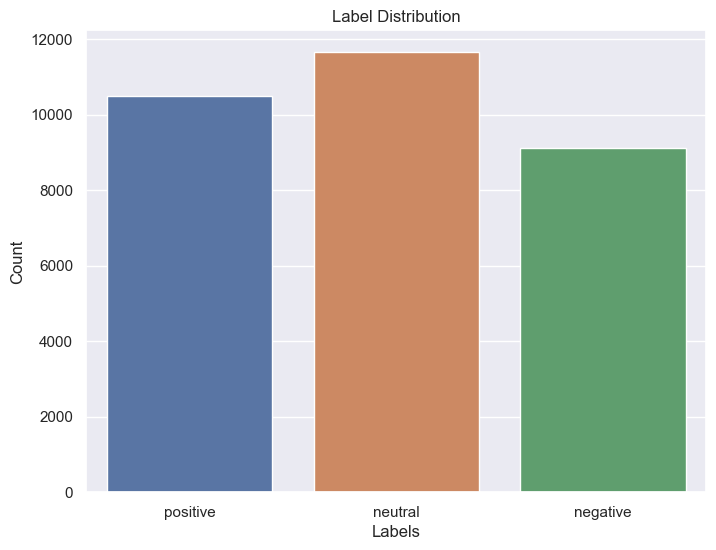

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(x='sentiment', data=train_ds, hue='sentiment', legend=False)
plt.title("Label Distribution")
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

In [9]:
test_ds['label'].value_counts()


label
1    1929
2    1730
0    1546
Name: count, dtype: int64

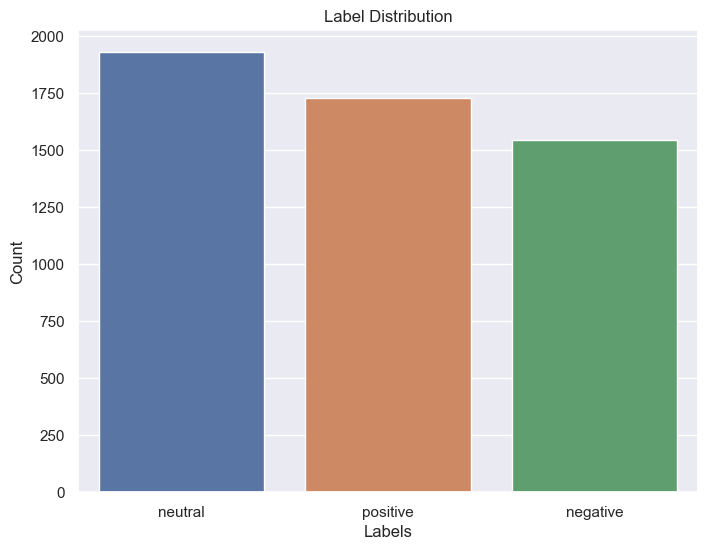

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(x='sentiment', data=test_ds, hue='sentiment', legend=False)
plt.title("Label Distribution")
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

In [11]:
val_ds['label'].value_counts()

label
1    1928
2    1760
0    1517
Name: count, dtype: int64

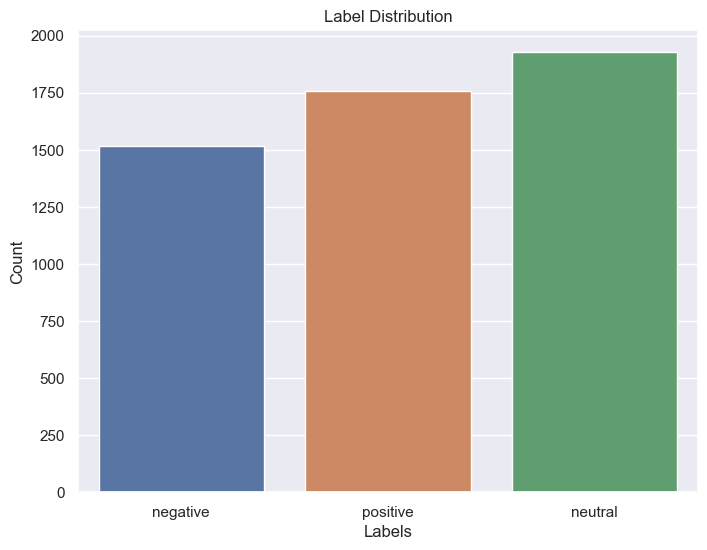

In [12]:
plt.figure(figsize=(8,6))
sns.countplot(x='sentiment', data=val_ds, hue='sentiment', legend=False)
plt.title("Label Distribution")
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

For each of the datasets, the distribution of the labels seem to be relatively balanced / close to balanced. Where the occuerences are ranked by neutral, positive, then negative for each dataset.

## Change the labels to range from -1 to 1
where:
- -1 = negative sentiment
-  0 = neutral sentiment
-  1 = positive sentiment

In [13]:
train_ds['label'].unique()

array([2, 1, 0])

In [14]:
train_ds['label'] = train_ds['label'] - 1
test_ds['label'] = test_ds['label'] - 1
val_ds['label'] = val_ds['label'] - 1

In [15]:
train_ds['label'].unique()

array([ 1,  0, -1])

In [16]:
train_ds.head()

,id,text,label,sentiment
0,9536,"Cooking microwave pizzas, yummy",1,positive
1,6135,Any plans of allowing sub tasks to show up in ...,0,neutral
2,17697,"I love the humor, I just reworded it. Like sa...",1,positive
3,14182,naw idk what ur talkin about,0,neutral
4,17840,That sucks to hear. I hate days like that,-1,negative


## Visualise distribution of words per review

In [17]:
train_ds['word_count'] = train_ds['text'].apply(lambda x: len(x.split()))
val_ds['word_count'] = val_ds['text'].apply(lambda x: len(x.split()))
test_ds['word_count'] = test_ds['text'].apply(lambda x: len(x.split()))


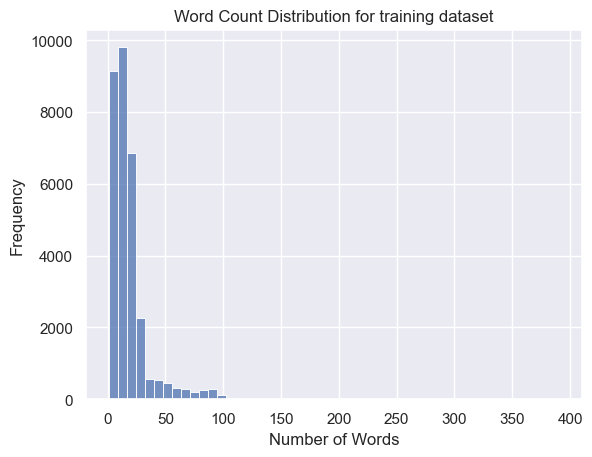

In [18]:
sns.histplot(train_ds['word_count'], bins=50)
plt.title('Word Count Distribution for training dataset')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

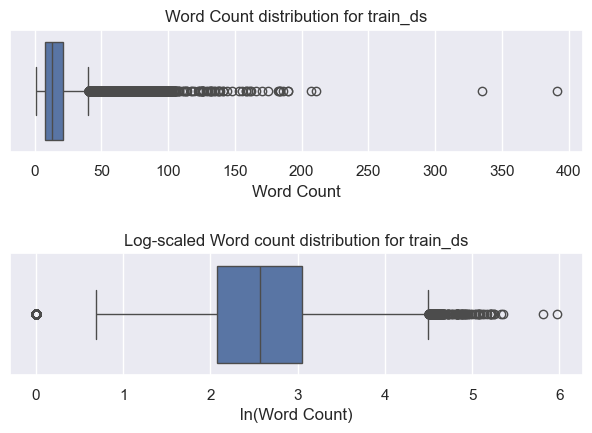

In [19]:
fig, ax = plt.subplots(2,1)

sns.boxplot(x=train_ds['word_count'], ax=ax[0])
ax[0].set_title('Word Count distribution for train_ds')
ax[0].set_xlabel('Word Count')

sns.boxplot(x=np.log(train_ds['word_count']), ax=ax[1])
ax[1].set_xlabel('ln(Word Count)')
ax[1].set_title('Log-scaled Word count distribution for train_ds')
plt.tight_layout(pad=2.0)
plt.show()

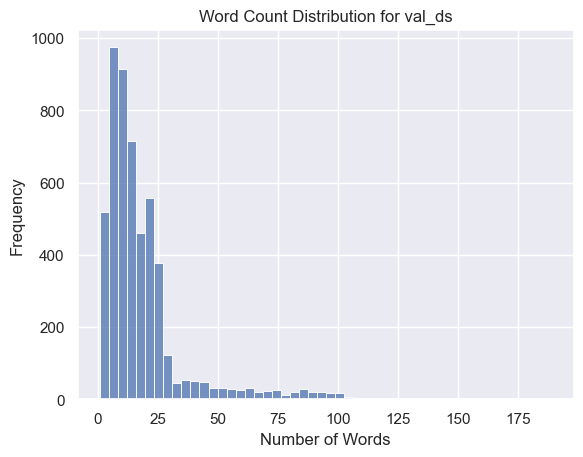

In [20]:
sns.histplot(val_ds['word_count'], bins=50)
plt.title('Word Count Distribution for val_ds')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

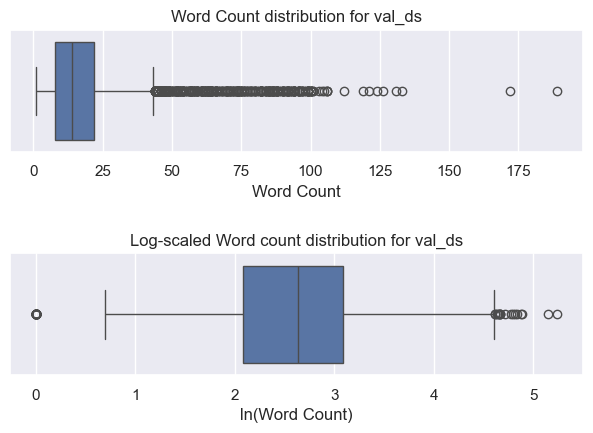

In [21]:
fig, ax = plt.subplots(2,1)

sns.boxplot(x=val_ds['word_count'], ax=ax[0])
ax[0].set_title('Word Count distribution for val_ds')
ax[0].set_xlabel('Word Count')

sns.boxplot(x=np.log(val_ds['word_count']), ax=ax[1])
ax[1].set_xlabel('ln(Word Count)')
ax[1].set_title('Log-scaled Word count distribution for val_ds')
plt.tight_layout(pad=2.0)
plt.show()

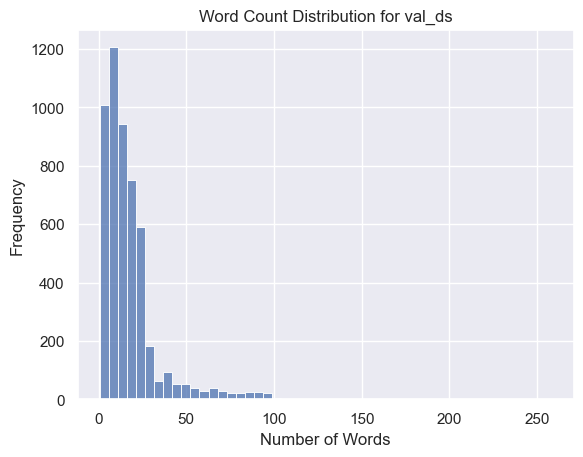

In [22]:
sns.histplot(test_ds['word_count'], bins=50)
plt.title('Word Count Distribution for val_ds')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

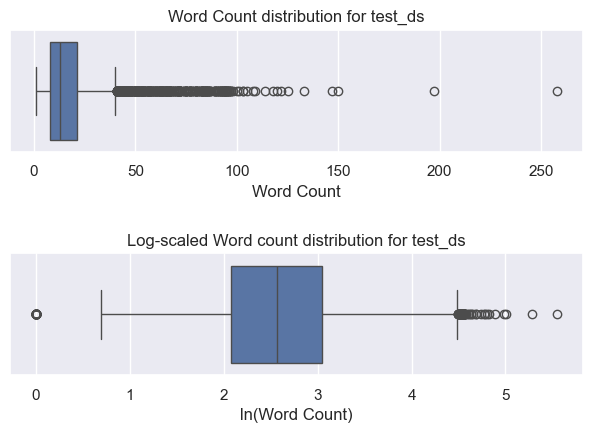

In [23]:
fig, ax = plt.subplots(2,1)

sns.boxplot(x=test_ds['word_count'], ax=ax[0])
ax[0].set_title('Word Count distribution for test_ds')
ax[0].set_xlabel('Word Count')

sns.boxplot(x=np.log(test_ds['word_count']), ax=ax[1])
ax[1].set_xlabel('ln(Word Count)')
ax[1].set_title('Log-scaled Word count distribution for test_ds')
plt.tight_layout(pad=2.0)
plt.show()

## Visualise Unigrams and N-grams after removing stop words

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(df, text_column='clean_text', ngram_range=(1,1), top_n=20):
    vectorizer = CountVectorizer(stop_words='english', ngram_range=ngram_range)
    X = vectorizer.fit_transform(df[text_column])
    counts = X.sum(axis=0).A1
    ngrams = vectorizer.get_feature_names_out()
    
    freq_df = pd.DataFrame({'ngram': ngrams, 'count': counts})
    return freq_df.sort_values(by='count', ascending=False).head(top_n)


In [25]:
top_n = 10
word_count_train = get_top_ngrams(train_ds, text_column='text', top_n = top_n)
word_count_test = get_top_ngrams(test_ds, text_column='text', top_n = top_n)
word_count_val = get_top_ngrams(val_ds, text_column='text', top_n = top_n)

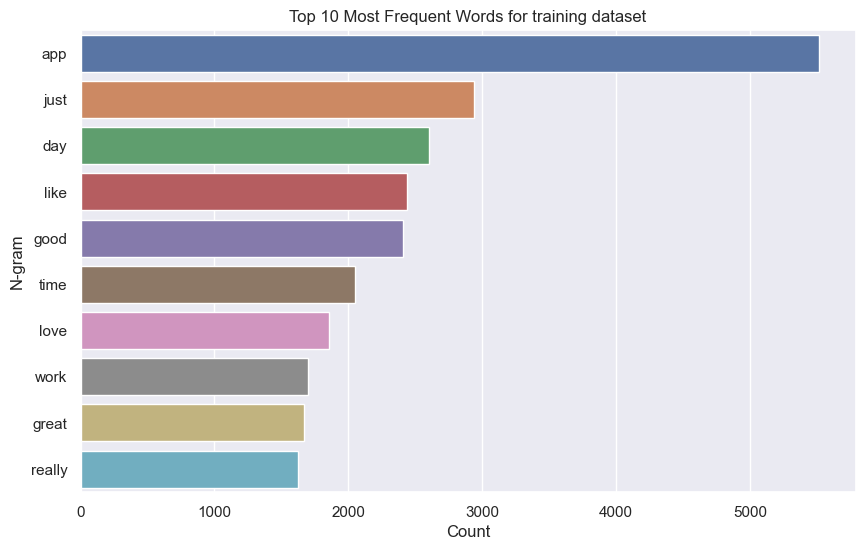

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(data=word_count_train, x='count', y='ngram', hue='ngram', legend=False)
plt.title(f'Top {top_n} Most Frequent Words for training dataset')
plt.xlabel('Count')
plt.ylabel('N-gram')
plt.show()

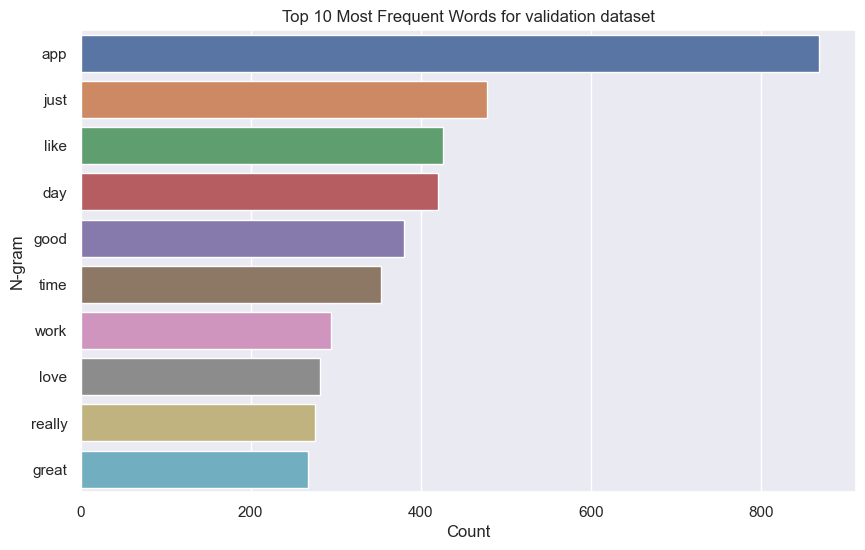

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(data=word_count_test, x='count', y='ngram', hue='ngram', legend=False)
plt.title(f'Top {top_n} Most Frequent Words for validation dataset')
plt.xlabel('Count')
plt.ylabel('N-gram')
plt.show()

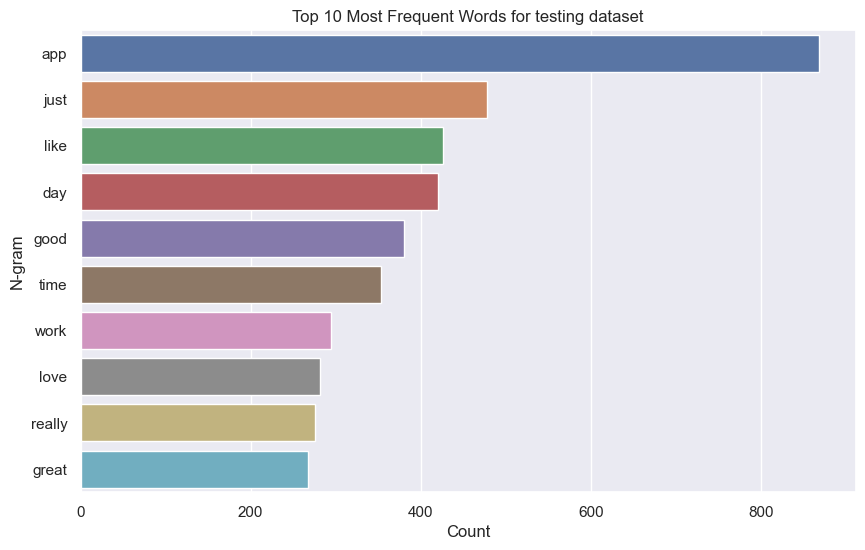

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(data=word_count_test, x='count', y='ngram', hue='ngram', legend=False)
plt.title(f'Top {top_n} Most Frequent Words for testing dataset')
plt.xlabel('Count')
plt.ylabel('N-gram')
plt.show()

From the visualisation of the Uni-gram frequency for each dataset, we can see that the top 10 unigrams are consistent across each dataset.

In [57]:
from torch.utils.data import DataLoader, Dataset
from transformers import AutoTokenizer

In [59]:
tokeniser = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [116]:
class SentimentDataSet(Dataset):
    def __init__(self, df, tokenizer, max_len=128):
        self.texts = df['text']
        self.labels = df['label']
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        return text, label


In [117]:
test = SentimentDataSet(train_ds[['text','label']], tokeniser)
train_dataloader = DataLoader(test, batch_size=16, shuffle=True)


In [118]:
x,y = next(iter(train_dataloader))


In [121]:
x

(' So-so, thanks  I`ve uploaded a new campaign vid, will post the link in a few mins. how are you doing, babe??',
 "It was already very irritating to see your latest added tasks being pushed at the bottom and you have to everytime open the app to rearrange. And with new update you can't even open the app from the widget, you have to create a seperate icon which is super super annoying. Probably gonna uninstall the app if this is not fixed soon.",
 '...normal hours to give any interested twitter friends a glimpse into a topic near and dear to us.',
 'Great to track simple stuff. I track exercise and days I stick to my diet. It is helping to keep me honest without much effort.',
 'last day of work  ...but everyone is making it so great!',
 'I`m at work',
 ' aw  were sad you had to leave tokyo. come back.please',
 "Absolutely amazing app for helping you to organise projects at home and at work and actually get stuff done. Get it you won't regret it.",
 'Very easy to use. However syncing w

In [122]:
y

tensor([ 0, -1,  0,  1,  1,  0, -1,  1,  1,  0,  1, -1,  1,  1,  1,  0])